<a href="https://colab.research.google.com/github/soumo99/DL_Codes/blob/main/ANN_Churn_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT 2.3
# NAME - SOUMOBRATA MANNA
# UID - 21MCA2484
# SEC - 8 A
# SUBJECT CODE - 21CAP - 703
# SUBJECT NAME - MACHINE LEARNING LAB


# Q : Write a program based on Artificial Neural Network using churn modelling dataset.

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # contains functions that can create entire figures at once , open source plotting library
import missingno as msno # Python library for the exploratory visualization of missing data

In [91]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Data Analysis and Preprocessing


In [92]:
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [93]:
data.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [95]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [96]:
data.drop(['customer_id'],axis=1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [97]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [98]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

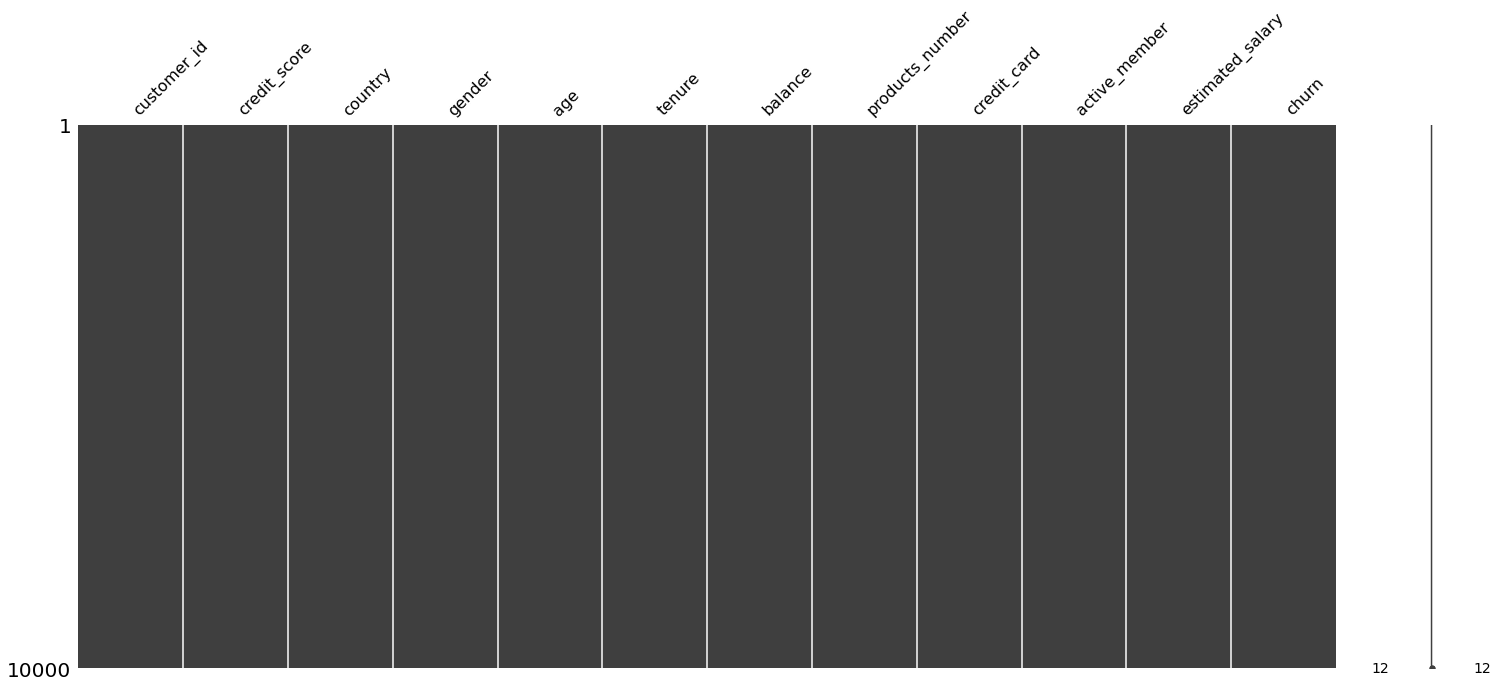

In [99]:
msno.matrix(data)

OBSERVATION : 

1. There are total of 12 columns and 10000 rows in data.

2. Dataset contains no missing value.
3. We drop Customer ID feature as it is of no use.
4. Churn is the Target Variable.
5. The data is of people from 3 countries, which are France,Germany and Spain.
6. There are a total of 110000 (10000 x 11) observations.

## Exploratory Data Analysis

In [100]:
features = data.keys()
features = features.drop('churn')
data.groupby('churn')[features].mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [101]:
data.groupby('churn')[features].median()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


In [102]:
figure = px.histogram(data, x = 'age', y = 'balance', color = 'churn',
                      marginal = 'box', hover_data = data.columns)

figure.show()

Observation - It is observed that customer with sum of balance less than 9M are churned of varying age groups

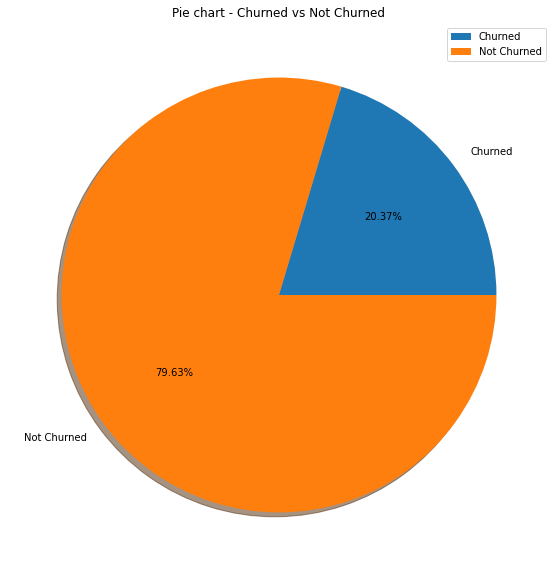

In [103]:
plt.figure(figsize = (15,10))
size_data = [data.churn[data['churn']==1].count() , data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
plt.pie(size_data, labels = labels, shadow = True, autopct = '%1.2f%%')
plt.legend()
plt.title('Pie chart - Churned vs Not Churned')
plt.show()

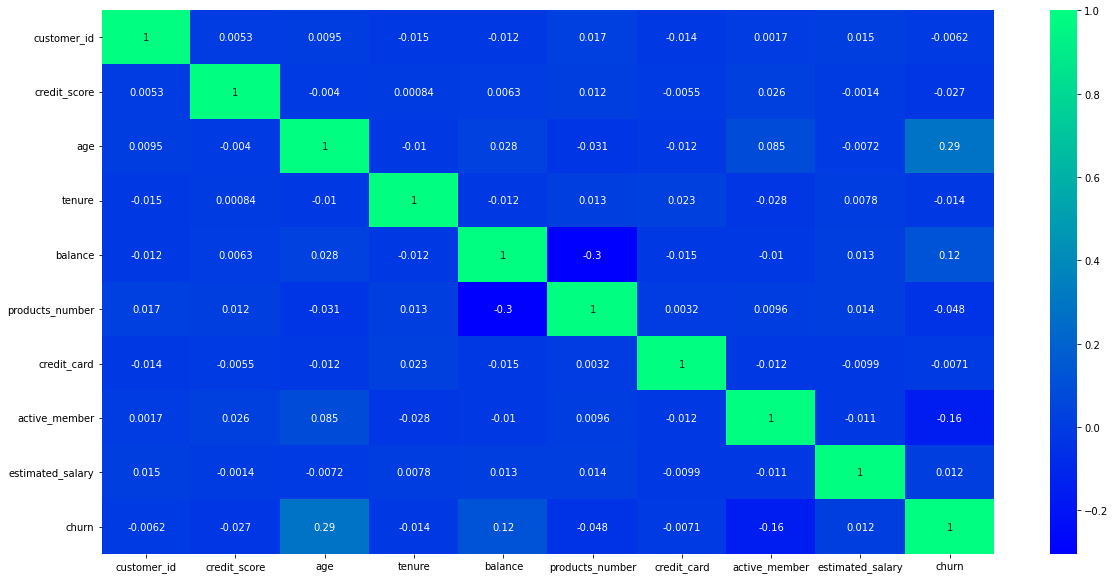

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(), annot=True,cmap = "winter")

In [105]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [106]:
data['country'] = data['country'].map({'France':1,'Spain':2,'Germany':3})

In [107]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [108]:
data['gender'] = data['gender'].map({'Male':1,'Female':2})

In [109]:
#Dividing the dataset to independent and dependent variables 
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [110]:
X

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,1,2,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,2,41,1,83807.86,1,0,1,112542.58
2,15619304,502,1,2,42,8,159660.80,3,1,0,113931.57
3,15701354,699,1,2,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,1,2,36,7,0.00,1,0,1,42085.58
9998,15682355,772,3,1,42,3,75075.31,2,1,0,92888.52


In [111]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [112]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Building the model of Artificial Neural Network

In [114]:
def build_model(hp): #hp is the parameter , assigning the instance of the specific model 
  model = keras.Sequential()  
  for i in range(hp.Int('num_layers',2,20)): #hidden layers will be between 2 - 20
    model.add(layers.Dense(units = hp.Int( 'units', 
                                          min_value = 32, #no. of neurons will be 32 and 512
                                          max_value = 512,
                                          step = 32), #When sampling from it, the minimum step for walking through the interval is 32.
                           activation = 'relu')) 
  model.add(layers.Dense(1,activation = 'sigmoid')) 
  model.compile(
      optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),  
        loss='categorical_crossentropy',
        metrics=['accuracy']
  )
  return model

In [115]:
tuner  = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3)

In [116]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [118]:
X_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
7681,15633608,641,1,1,33,2,146193.60,2,1,1,55796.83
9031,15742323,541,1,1,39,7,0.00,2,1,0,19823.02
3691,15760244,590,1,2,76,5,160979.68,1,0,1,13848.58
202,15600974,516,2,1,50,5,0.00,1,0,1,146145.93
5625,15663234,508,1,2,60,7,143262.04,1,1,1,129562.74
...,...,...,...,...,...,...,...,...,...,...,...
9225,15584928,594,3,2,32,4,120074.97,2,1,1,162961.79
4859,15647111,794,2,2,22,4,114440.24,1,1,1,107753.07
3264,15574372,738,1,1,35,5,161274.05,2,1,0,181429.87
9845,15664035,590,2,2,38,9,0.00,2,1,1,148750.16


In [119]:
X_test

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9394,15615753,597,3,2,35,8,131101.04,1,1,1,192852.67
898,15654700,523,1,2,40,2,102967.41,1,1,0,128702.10
2398,15633877,706,2,2,42,8,95386.82,1,1,1,75732.25
5906,15745623,788,1,1,32,4,112079.58,1,0,0,89368.59
2343,15765902,706,3,1,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...,...,...,...
4004,15738546,530,2,2,41,4,0.00,2,0,1,147606.71
7375,15638871,639,1,1,77,6,80926.02,2,1,1,55829.25
9307,15680405,685,1,1,40,2,168001.34,2,1,1,167400.29
8394,15597983,692,1,1,69,10,154953.94,1,1,1,70849.47


In [120]:
#Scaling down the datas 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
X_train

array([[-0.81154995, -0.09792126, -0.89191831, ...,  0.64198477,
         0.96683535, -0.76862426],
       [ 0.70682076, -1.12612023, -0.89191831, ...,  0.64198477,
        -1.03430227, -1.39359887],
       [ 0.95711484, -0.62230274, -0.89191831, ..., -1.55766936,
         0.96683535, -1.49739308],
       ...,
       [-1.638871  ,  0.89943174, -0.89191831, ...,  0.64198477,
        -1.03430227,  1.41400417],
       [-0.38659051, -0.62230274,  0.31734533, ...,  0.64198477,
         0.96683535,  0.84625811],
       [-1.38127242, -0.28299708,  1.52660897, ...,  0.64198477,
        -1.03430227,  0.32689267]])

In [122]:
X_test

array([[-1.06092225, -0.55032881,  1.52660897, ...,  0.64198477,
         0.96683535,  1.61245299],
       [-0.51696802, -1.31119605, -0.89191831, ...,  0.64198477,
        -1.03430227,  0.49796226],
       [-0.80779296,  0.57040807,  0.31734533, ...,  0.64198477,
         0.96683535, -0.42228531],
       ...,
       [-0.15795851,  0.35448628, -0.89191831, ...,  0.64198477,
         0.96683535,  1.17026765],
       [-1.30910739,  0.42646021, -0.89191831, ...,  0.64198477,
         0.96683535, -0.50711407],
       [-1.4026412 ,  0.82745781,  1.52660897, ...,  0.64198477,
         0.96683535, -1.15148134]])

In [123]:
#Training the model and checking for best hyperparameters 
tuner.search(X_train, Y_train,
             epochs=5,
             validation_data=(X_test, Y_test))

In [124]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 16
units: 416
learning_rate: 0.001
Score: 0.7929999828338623
Trial summary
Hyperparameters:
num_layers: 16
units: 128
learning_rate: 0.001
Score: 0.7929999828338623
Trial summary
Hyperparameters:
num_layers: 3
units: 160
learning_rate: 0.01
Score: 0.7929999828338623
Trial summary
Hyperparameters:
num_layers: 16
units: 480
learning_rate: 0.0001
Score: 0.7929999828338623
Trial summary
Hyperparameters:
num_layers: 8
units: 512
learning_rate: 0.001
Score: 0.7929999828338623
